# **QUANTUM-FORAGE-TASK1**

**IMPORTING REUQIRED LIBRARIES**

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kurtosis, skew
from wordcloud import WordCloud
import calendar
from scipy.stats import pearsonr as r
from scipy.stats import ttest_ind as tin

In [2]:
df=pd.read_excel("/content/drive/MyDrive/01/quantum o new.xlsx",parse_dates=['DATE'])
df.head(4)

,DATE,TXN_ID,STORE_NBR,PROD_NBR,PROD_NAME,PRODUCT,BRAND_NAME,grams,PROD_QTY,TOT_SALES,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1,5,Natural Chip CompnySeaSalt,CompnySeaSalt,Natural Chip,175,2.0,6.0,1000,YOUNG SINGLES/COUPLES,Premium
1,2018-09-16,2,1,58,Red Rock Deli Chikn&GarlicAioli,Chikin&GarlicAioli,Red Rock Deli,150,1.0,2.7,1002,YOUNG SINGLES/COUPLES,Mainstream
2,2019-03-07,3,1,52,Grain Waves SourCream&Chives,sourCream&Chives,Grain Waves,210,1.0,3.6,1003,YOUNG FAMILIES,Budget
3,2019-03-08,4,1,106,Natural ChipCo Hony SoyChckn,SoyChkn,Natural ChipCo Hony,175,1.0,3.0,1003,YOUNG FAMILIES,Budget


**DATA WRANGLING**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   DATE              264836 non-null  datetime64[ns]
 1   TXN_ID            264836 non-null  int64         
 2   STORE_NBR         264836 non-null  int64         
 3   PROD_NBR          264836 non-null  int64         
 4   PROD_NAME         264836 non-null  object        
 5   PRODUCT           264836 non-null  object        
 6   BRAND_NAME        264836 non-null  object        
 7   grams             264836 non-null  object        
 8   PROD_QTY          264834 non-null  float64       
 9   TOT_SALES         264836 non-null  float64       
 10  LYLTY_CARD_NBR    264836 non-null  int64         
 11  LIFESTAGE         264836 non-null  object        
 12  PREMIUM_CUSTOMER  264836 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(4), object(6)
memor

In [4]:
df.isnull().sum()

DATE                0
TXN_ID              0
STORE_NBR           0
PROD_NBR            0
PROD_NAME           0
PRODUCT             0
BRAND_NAME          0
grams               0
PROD_QTY            2
TOT_SALES           0
LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

In [5]:
df.dropna(axis=0,inplace=True)

In [6]:
df.isnull().sum()

DATE                0
TXN_ID              0
STORE_NBR           0
PROD_NBR            0
PROD_NAME           0
PRODUCT             0
BRAND_NAME          0
grams               0
PROD_QTY            0
TOT_SALES           0
LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

In [7]:
df.shape

(264834, 13)

In [8]:
df.dtypes

DATE                datetime64[ns]
TXN_ID                       int64
STORE_NBR                    int64
PROD_NBR                     int64
PROD_NAME                   object
PRODUCT                     object
BRAND_NAME                  object
grams                       object
PROD_QTY                   float64
TOT_SALES                  float64
LYLTY_CARD_NBR               int64
LIFESTAGE                   object
PREMIUM_CUSTOMER            object
dtype: object

In [9]:
df[['TXN_ID', 'STORE_NBR', 'PROD_NBR','LYLTY_CARD_NBR']]=df[['TXN_ID', 'STORE_NBR', 'PROD_NBR','LYLTY_CARD_NBR']].astype(object)
df.dtypes

DATE                datetime64[ns]
TXN_ID                      object
STORE_NBR                   object
PROD_NBR                    object
PROD_NAME                   object
PRODUCT                     object
BRAND_NAME                  object
grams                       object
PROD_QTY                   float64
TOT_SALES                  float64
LYLTY_CARD_NBR              object
LIFESTAGE                   object
PREMIUM_CUSTOMER            object
dtype: object

In [10]:
df.columns

Index(['DATE', 'TXN_ID', 'STORE_NBR', 'PROD_NBR', 'PROD_NAME', 'PRODUCT',
       'BRAND_NAME', 'grams', 'PROD_QTY', 'TOT_SALES', 'LYLTY_CARD_NBR',
       'LIFESTAGE', 'PREMIUM_CUSTOMER'],
      dtype='object')

In [11]:
df.describe(include='object')

,TXN_ID,STORE_NBR,PROD_NBR,PROD_NAME,PRODUCT,BRAND_NAME,grams,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
count,264834,264834,264834,264834,264834,264834,264834,264834,264834,264834
unique,263125,272,114,114,106,86,21,72636,7,3
top,222775,226,102,Kettle Mozzarella Basil &Pesto,saltBinegar,Pringles,175,162039,OLDER SINGLES/COUPLES,Mainstream
freq,3,2022,3304,3304,9228,18788,66390,18,54479,101987


In [12]:
df.describe(include='float')

,PROD_QTY,TOT_SALES
count,264834.000000,264834.000000
mean,1.905813,7.304173
std,0.343436,3.083222
min,1.000000,1.500000
25%,2.000000,5.400000
50%,2.000000,7.400000
75%,2.000000,9.200000
max,5.000000,650.000000


In [13]:
z_score=np.abs((df['TOT_SALES']-df['TOT_SALES'].mean())/df['TOT_SALES'].std())
dfn=df[z_score<=3]
dfn

,DATE,TXN_ID,STORE_NBR,PROD_NBR,PROD_NAME,PRODUCT,BRAND_NAME,grams,PROD_QTY,TOT_SALES,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1,5,Natural Chip CompnySeaSalt,CompnySeaSalt,Natural Chip,175,2.0,6.0,1000,YOUNG SINGLES/COUPLES,Premium
1,2018-09-16,2,1,58,Red Rock Deli Chikn&GarlicAioli,Chikin&GarlicAioli,Red Rock Deli,150,1.0,2.7,1002,YOUNG SINGLES/COUPLES,Mainstream
2,2019-03-07,3,1,52,Grain Waves SourCream&Chives,sourCream&Chives,Grain Waves,210,1.0,3.6,1003,YOUNG FAMILIES,Budget
3,2019-03-08,4,1,106,Natural ChipCo Hony SoyChckn,SoyChkn,Natural ChipCo Hony,175,1.0,3.0,1003,YOUNG FAMILIES,Budget
4,2018-11-02,5,1,96,WW Original StackedChips,StackedChips,WW Original,160,1.0,1.9,1004,OLDER SINGLES/COUPLES,Mainstream
...,...,...,...,...,...,...,...,...,...,...,...,...,...
264829,2018-12-26,240318,88,9,Kettle TortillaChpsBtroot&Ricotta,TortillaChpsBtroot&Ricotta,Kettle,150,2.0,9.2,2370581,OLDER SINGLES/COUPLES,Budget
264830,2018-08-03,240350,88,4,Dorito Corn ChpSupreme,chpBupreme,Dorito Corn,380,2.0,13.0,2370651,MIDAGE SINGLES/COUPLES,Mainstream
264831,2018-12-08,240378,88,24,Grain Waves SweetChilli,sweetBhilli,Grain Waves,210,2.0,7.2,2370701,YOUNG FAMILIES,Mainstream
264832,2018-10-01,240394,88,60,Kettle TortillaChpsFeta&Garlic,TortillaChpsFeta&Garlic,Kettle,150,2.0,9.2,2370751,YOUNG FAMILIES,Premium


In [14]:
print(f"The other descriptives about Total Sales are\n Median: {dfn['TOT_SALES'].median()}\n Mode: {dfn['TOT_SALES'].mode()}\n Kurtosis: {kurtosis(dfn['TOT_SALES'])}\n Skewness: {dfn['TOT_SALES'].skew()}")

The other descriptives about Total Sales are
 Median: 7.4
 Mode: 0    9.2
Name: TOT_SALES, dtype: float64
 Kurtosis: -0.5672017758236838
 Skewness: 0.027841093778780333


From the above informations the "Total Sales" skeweness is nearer to zero  with slighter positive skewness which means it exhibits the symmetricity of the distribution of the data and for the kurtosis it exhibits the characteristics of the platykurtic which has flatted peakness and less(less extreme values) amount of data lie away from the mean value.

# **DATA VISUALIZATION**

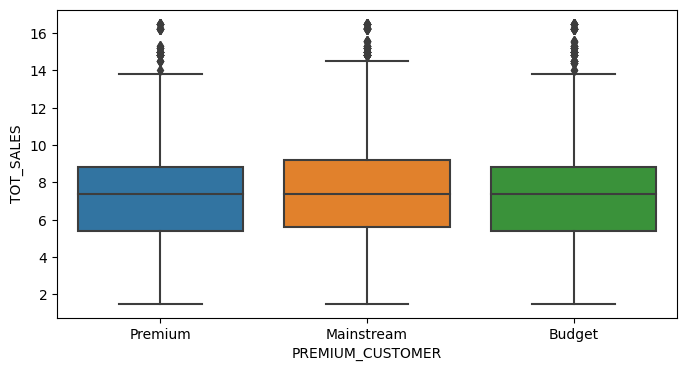

In [15]:
plt.figure(figsize=(8,4))
sns.boxplot(x=dfn['PREMIUM_CUSTOMER'],y=dfn['TOT_SALES'])
plt.show()

<ipython-input-16-fe3ba02620dc>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dfn['TOT_SALES'],bins=10,color='red')


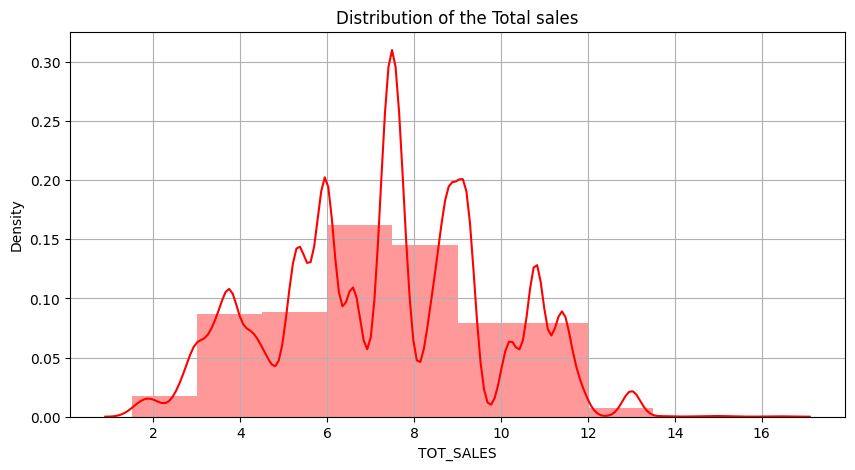

In [16]:
plt.figure(figsize=(10,5))
sns.distplot(dfn['TOT_SALES'],bins=10,color='red')
plt.title('Distribution of the Total sales')
plt.grid()
plt.show()

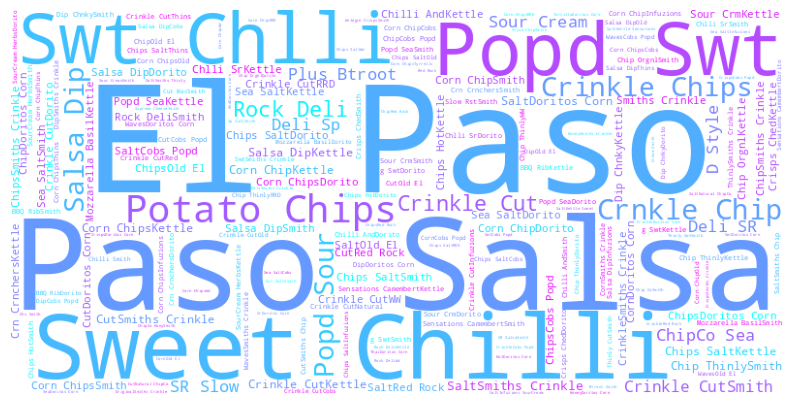

In [17]:
plt.figure(figsize=(10,10))
text=''.join(dfn['BRAND_NAME'].astype(str))
wc=WordCloud(width=800,height=400,background_color='white',min_font_size =3,colormap='cool').generate(text)
plt.imshow(wc)
plt.axis('off')
plt.show()

Paso Sasla, El Paso, Sweet chilli and popd Swt are most prefered brands among the other brands among the population.

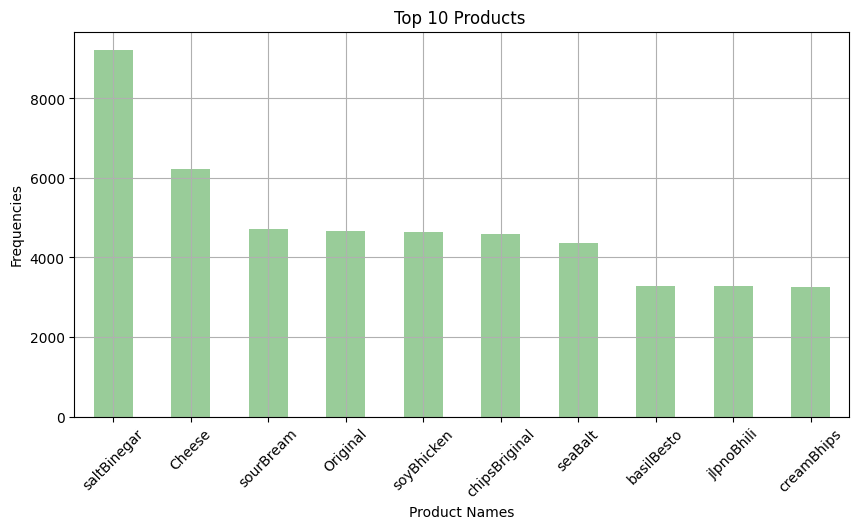

In [18]:
plt.figure(figsize=(10,5))
top10=dfn['PRODUCT'].value_counts().head(10)
top10.plot(kind='bar',color='g',title="Top 10 Products ",xlabel="Product Names",ylabel='Frequencies',alpha=0.4)
plt.grid()
plt.xticks(rotation=45)
plt.show()

From the bar plot we can the SaltBinegar, Cheese and SourBream are the top 3 products highly consumed by the people from the dataset.

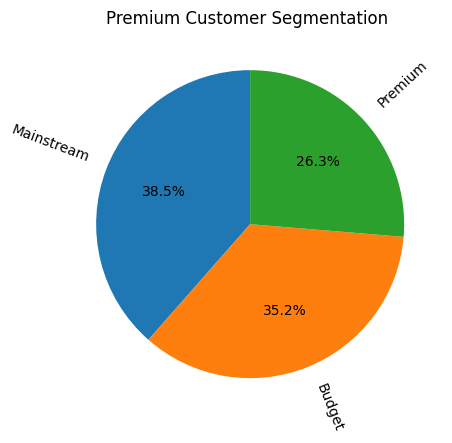

In [19]:
plt.figure(figsize=(8,5))
counts=dfn['PREMIUM_CUSTOMER'].value_counts()
plt.pie(counts,labels=counts.index,autopct="%.1f%%",rotatelabels=True,counterclock=True,startangle=90)
plt.title('Premium Customer Segmentation ')
plt.show()

The above pie chart exhibits the characteristic of the Premium customer segmentation among the people and its about 38.5% for Mainstream is the top most when considering the other two categories of Budget is about 35.2%  and the premium for 28.3%.

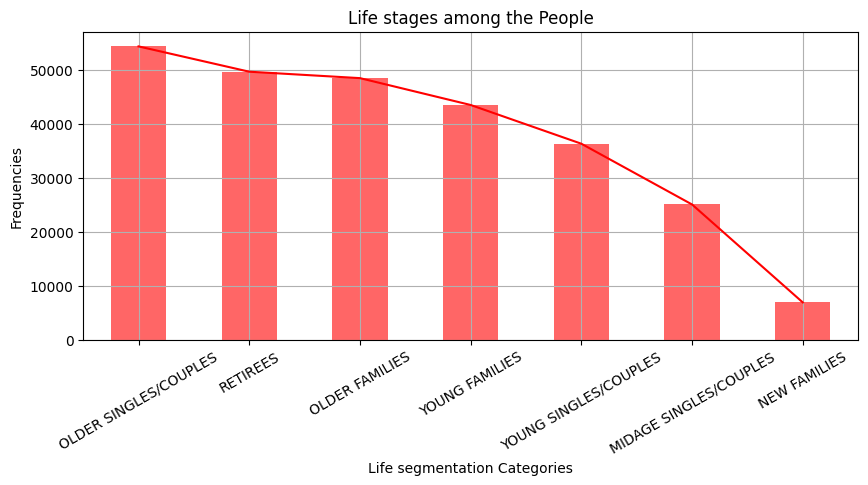

In [20]:
plt.figure(figsize=(10,4))
counts=dfn['LIFESTAGE'].value_counts()
counts.plot(kind='bar', title='Life stages among the People',xlabel='Life segmentation Categories', ylabel='Frequencies',cmap='hsv',alpha=0.6)
plt.plot(counts,color='r')
plt.xticks(rotation=30)
plt.grid()
plt.show()

From the data Older Singles/couples population is very high secondly the retireers, Older families and etc...

In [21]:
a='LIFESTAGE'
b='PREMIUM_CUSTOMER'
cat_counts=dfn.groupby([a,b]).size().unstack()
c=pd.DataFrame(cat_counts)
c

PREMIUM_CUSTOMER,Budget,Mainstream,Premium
LIFESTAGE,,,
MIDAGE SINGLES/COUPLES,5013,11851,8205
NEW FAMILIES,3003,2323,1587
OLDER FAMILIES,23112,14215,11169
OLDER SINGLES/COUPLES,18370,18286,17724
RETIREES,15171,21440,13076
YOUNG FAMILIES,19089,12887,11540
YOUNG SINGLES/COUPLES,9235,20821,6278


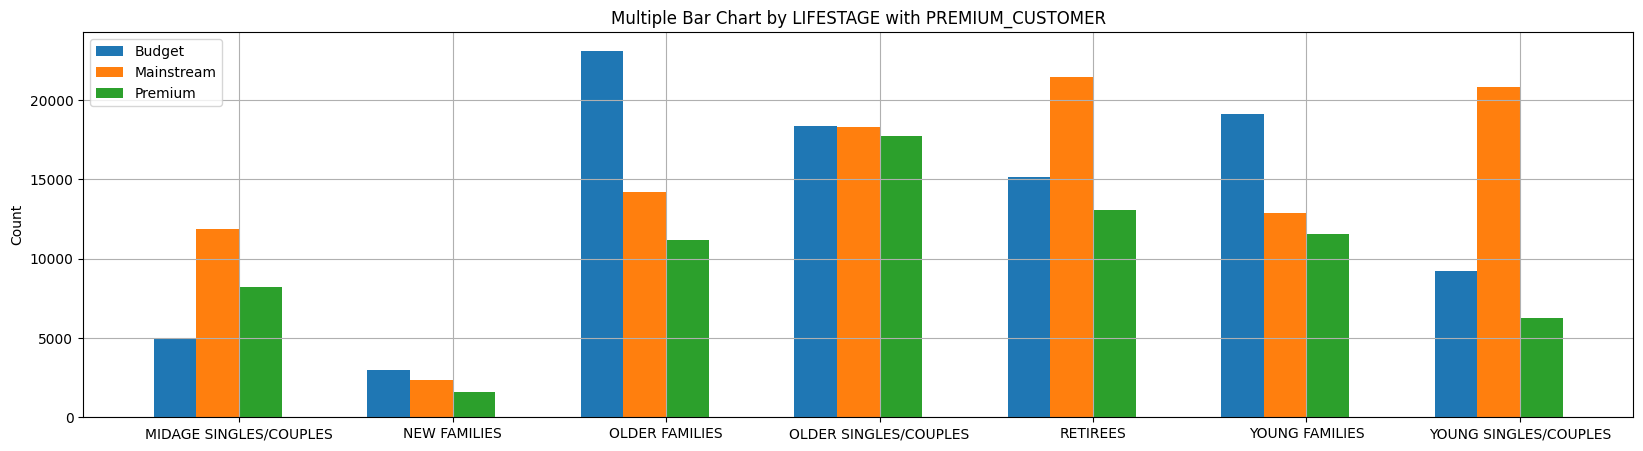

In [22]:
plt.figure(figsize=(20,5))
x=range(len(cat_counts))   # 7 categories for lifestage
width=0.6/len(cat_counts.columns)   #cat_columns-----> premium customer categories
for i, columns in enumerate(cat_counts.columns):
  plt.bar([j+(i*width) for j in x],cat_counts[columns],width=width, label=columns)
  plt.xticks([j+len(cat_counts.columns)*width/2 for j in x],cat_counts.index)
  plt.ylabel('Count')
plt.title('Multiple Bar Chart by LIFESTAGE with PREMIUM_CUSTOMER')
plt.legend()
plt.grid()
plt.show()

* From the above multiple bar chart we can clearly see that the older family poplulation prefers budget highly compare to other population.
* Retirees prefers more on the mainstream category than other way of Premium segmentation.
* Older Singles/Couples population prefers more on the Premium segmentation than any other lifestage categories.
* New families populations are the least participated among the any other population for the any preferences towards the premium segmentation


In [23]:
c1 = dfn.groupby(['PRODUCT','PREMIUM_CUSTOMER']).size().unstack()
c1=pd.DataFrame(c1.sort_values(by=list(c1.columns),ascending=False).head(10))
c1

PREMIUM_CUSTOMER,Budget,Mainstream,Premium
PRODUCT,,,
saltBinegar,3238.0,3568.0,2412.0
Cheese,2131.0,2481.0,1617.0
sourBream,1671.0,1814.0,1225.0
seaBalt,1669.0,1543.0,1155.0
Original,1642.0,1770.0,1242.0
chipsBriginal,1636.0,1760.0,1181.0
soyBhicken,1598.0,1794.0,1258.0
basilBesto,1158.0,1276.0,854.0
southernBhicken,1131.0,1228.0,809.0


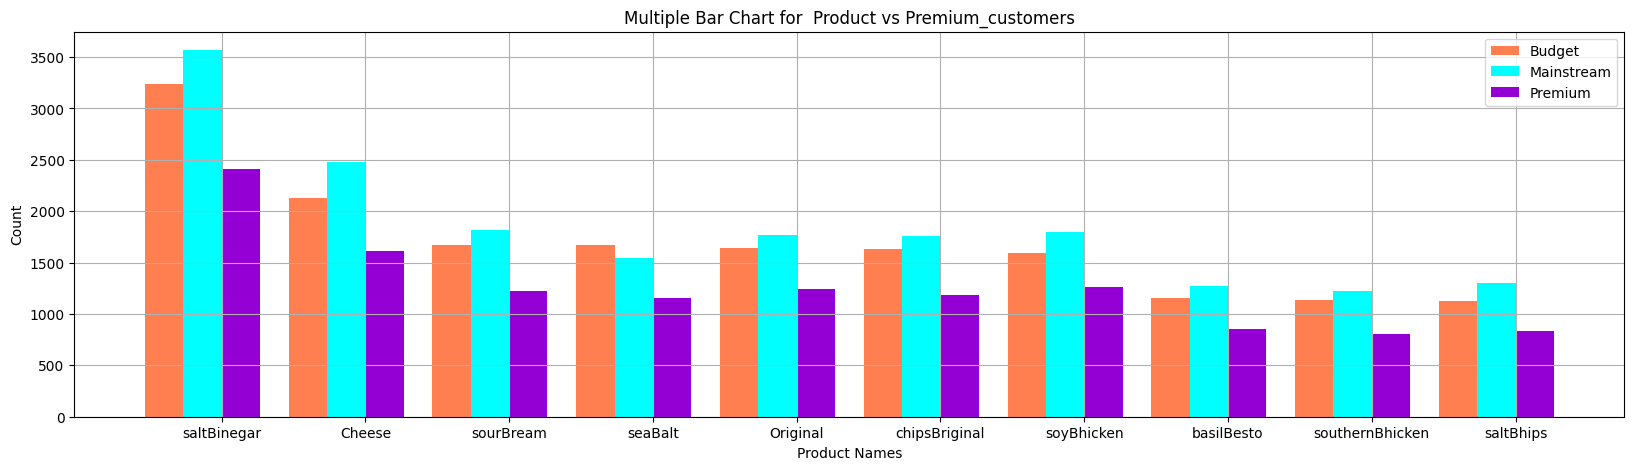

In [24]:
plt.figure(figsize=(20,5))
x=range(len(c1))
width=0.8/len(c1.columns)
color=['coral','cyan','darkviolet']
for i, columns in enumerate(c1.columns):
  plt.bar([j+(i*width) for j  in x],c1[columns],label=columns,width=width,color=color[i%len(color)])
  plt.xticks([j+len(c1.columns)*width/2 for j in x],c1.index)
plt.legend()
plt.xlabel('Product Names')
plt.ylabel('Count')
plt.title("Multiple Bar Chart for  Product vs Premium_customers")
plt.grid()
plt.show()

* Here, SaltBinegar is the top most  of all 3 of the premium customer segmentation categories.
* SouthernBhicken is lowest in the mainstream and premium in the top 10 products.
* SaltBhips is the lowest in the budget category of the Premium customers


In [25]:
freqtab=dfn.groupby('STORE_NBR')['TOT_SALES'].sum().sort_values(ascending=False)
c=pd.DataFrame(freqtab.head(10)).reset_index()
c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   STORE_NBR  10 non-null     int64  
 1   TOT_SALES  10 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 288.0 bytes


In [26]:
def str_no(x):
  return f'Store_NO: {x}'
c['STORE_NBR']=c['STORE_NBR'].apply(lambda x: str_no(x) )
print(c)

       STORE_NBR  TOT_SALES
0  Store_NO: 226   17486.25
1   Store_NO: 88   16249.25
2  Store_NO: 165   15832.15
3   Store_NO: 40   15501.10
4  Store_NO: 237   15493.90
5   Store_NO: 58   15173.05
6  Store_NO: 199   14747.20
7    Store_NO: 4   14629.95
8  Store_NO: 203   14491.60
9   Store_NO: 26   14408.00


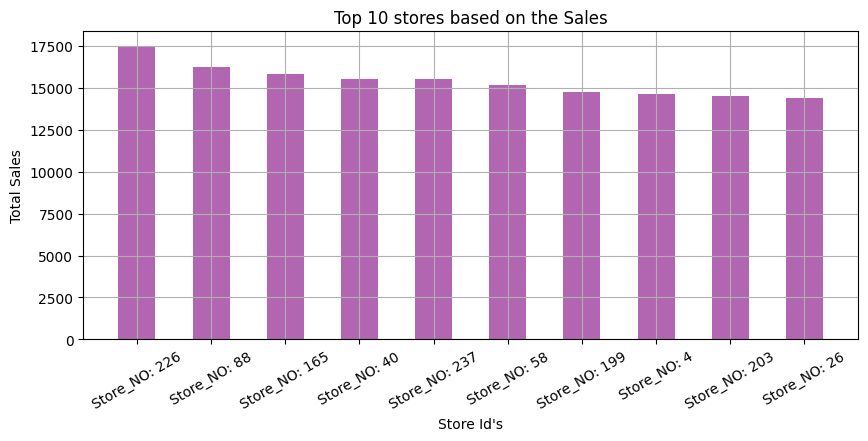

In [27]:
plt.figure(figsize=(10,4))
plt.bar(height=c['TOT_SALES'],x=c['STORE_NBR'],color='purple',alpha=0.6,width=0.5)
plt.xticks(rotation=30)
plt.title('Top 10 stores based on the Sales')
plt.xlabel("Store Id's")
plt.ylabel('Total Sales')
plt.grid()
plt.show()


The Store no: 226 has the high amount of sales when considering the top 10 stroes. And store no:26 has the lowest among the top 10 stores based on in its total sales

In [28]:
dfn['MONTH']=dfn['DATE'].dt.strftime('%b')
dfn['YEAR']=dfn['DATE'].dt.year
dfn.head(5)

<ipython-input-28-1e17ded1af2d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfn['MONTH']=dfn['DATE'].dt.strftime('%b')
<ipython-input-28-1e17ded1af2d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfn['YEAR']=dfn['DATE'].dt.year


,DATE,TXN_ID,STORE_NBR,PROD_NBR,PROD_NAME,PRODUCT,BRAND_NAME,grams,PROD_QTY,TOT_SALES,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,MONTH,YEAR
0,2018-10-17,1,1,5,Natural Chip CompnySeaSalt,CompnySeaSalt,Natural Chip,175,2.0,6.0,1000,YOUNG SINGLES/COUPLES,Premium,Oct,2018
1,2018-09-16,2,1,58,Red Rock Deli Chikn&GarlicAioli,Chikin&GarlicAioli,Red Rock Deli,150,1.0,2.7,1002,YOUNG SINGLES/COUPLES,Mainstream,Sep,2018
2,2019-03-07,3,1,52,Grain Waves SourCream&Chives,sourCream&Chives,Grain Waves,210,1.0,3.6,1003,YOUNG FAMILIES,Budget,Mar,2019
3,2019-03-08,4,1,106,Natural ChipCo Hony SoyChckn,SoyChkn,Natural ChipCo Hony,175,1.0,3.0,1003,YOUNG FAMILIES,Budget,Mar,2019
4,2018-11-02,5,1,96,WW Original StackedChips,StackedChips,WW Original,160,1.0,1.9,1004,OLDER SINGLES/COUPLES,Mainstream,Nov,2018


In [29]:
monthorder=[calendar.month_abbr[i] for i in range(1,13)]
dd=dfn.groupby('MONTH')['TOT_SALES'].sum().to_frame()
dd = dd.reindex(monthorder)
dd

,TOT_SALES
MONTH,
Jan,162642.30
Feb,150645.50
Mar,166265.20
Apr,159845.10
May,152371.35
Jun,160538.60
Jul,165258.20
Aug,153283.05
Sep,160522.00


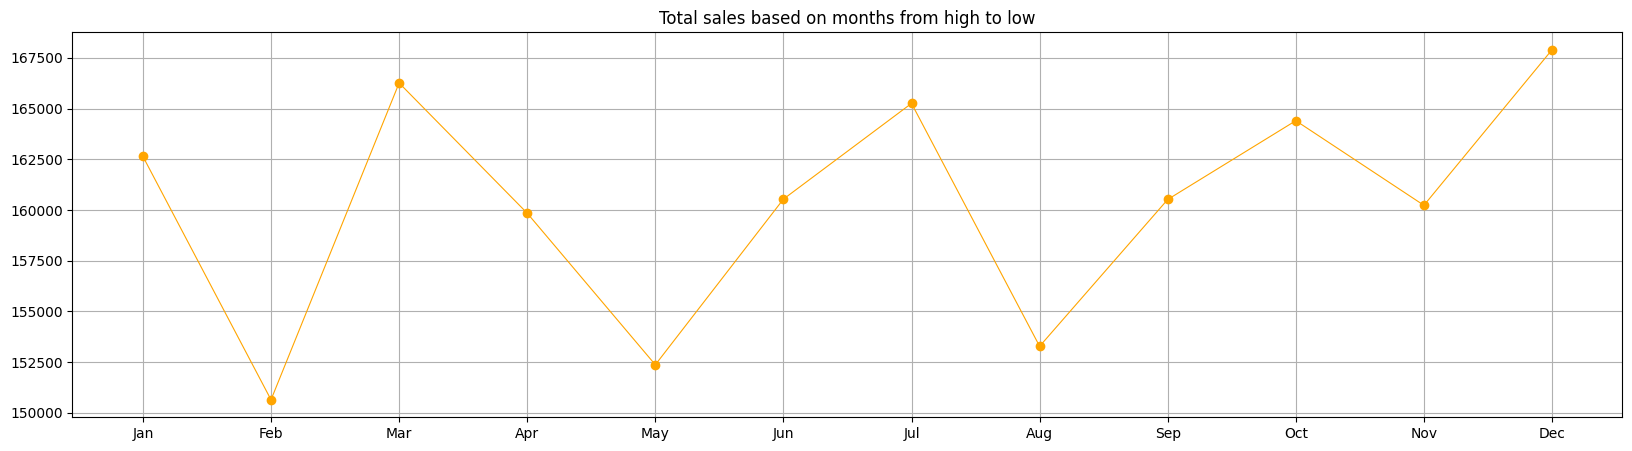

In [30]:
fig,ax=plt.subplots(figsize=(20,5))
ax.plot(dd.index,dd['TOT_SALES'],marker='o', color='orange', linewidth=0.8,alpha=1)
plt.title('Total sales based on months from high to low')
plt.grid()
plt.show()

From the above lineplot we can easily infer that the month December has the highest in terms of sales when compare to other months in the calendar year and the month Feb has the lowest sales among the months of the calendar years.

In [31]:
monthorder=[calendar.month_abbr[i] for i in range(1,13)]
c=dfn.pivot_table(index='MONTH',columns=['LIFESTAGE'],values='TOT_SALES',aggfunc='sum')
c=c.reindex(monthorder)
c

LIFESTAGE,MIDAGE SINGLES/COUPLES,NEW FAMILIES,OLDER FAMILIES,OLDER SINGLES/COUPLES,RETIREES,YOUNG FAMILIES,YOUNG SINGLES/COUPLES
MONTH,,,,,,,
Jan,15755.50,4345.60,30209.70,32750.20,30251.10,27408.6,21921.60
Feb,14260.60,4156.30,27702.90,31134.80,29179.30,24961.5,19250.10
Mar,15406.20,4473.70,30463.30,34344.70,31713.30,26478.2,23385.80
Apr,15994.40,4211.50,28934.60,32802.30,30371.80,26576.4,20954.10
May,14751.25,4036.30,27096.85,31736.25,29401.15,25383.2,19966.35
Jun,15429.70,4363.30,29018.50,33476.90,29512.60,26268.9,22468.70
Jul,15917.40,4150.10,30180.20,34998.60,30747.90,27142.1,22121.90
Aug,14545.95,3907.55,27547.15,32496.80,29425.15,24985.3,20375.15
Sep,16039.90,4301.90,28280.00,33726.70,29916.20,26347.1,21910.20


<Axes: title={'center': 'LifeStage based on Month prefernces by Total Sales'}, xlabel='Month', ylabel='Total Sales'>

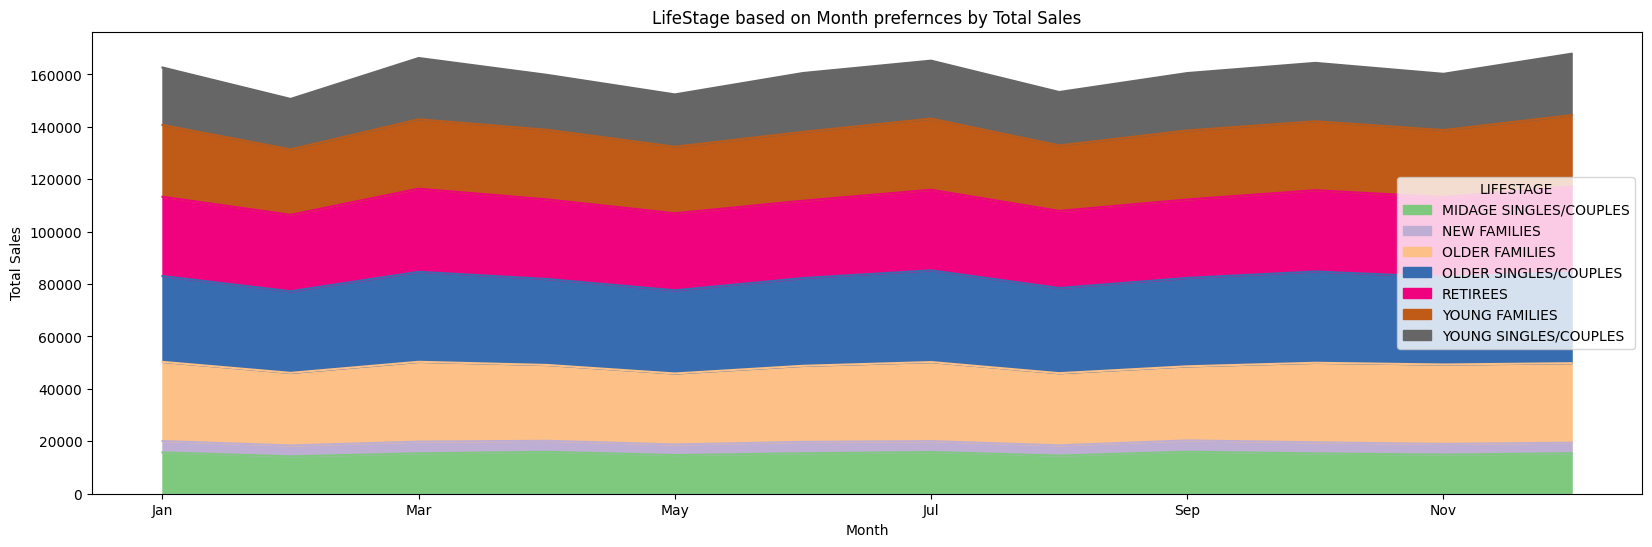

In [32]:
c.plot(kind='area',figsize=(20,6),legend='best',title='LifeStage based on Month prefernces by Total Sales',ylabel='Total Sales', xlabel='Month',cmap='Accent')

From the above area chart we can see that the Young Singles and Couples are the top most group when compare to other groups. And Midage Singles and Couples stays at the lower level among the other groups on month wise total sales spending.

In [33]:
g=dfn.pivot_table(index='PREMIUM_CUSTOMER',values='PROD_NBR',columns='PROD_QTY',aggfunc='count')
g

PROD_QTY,1.0,2.0,3.0,4.0,5.0
PREMIUM_CUSTOMER,,,,,
Budget,9341,83329,146,96,81
Mainstream,10956,90524,144,106,93
Premium,7216,62120,112,65,66


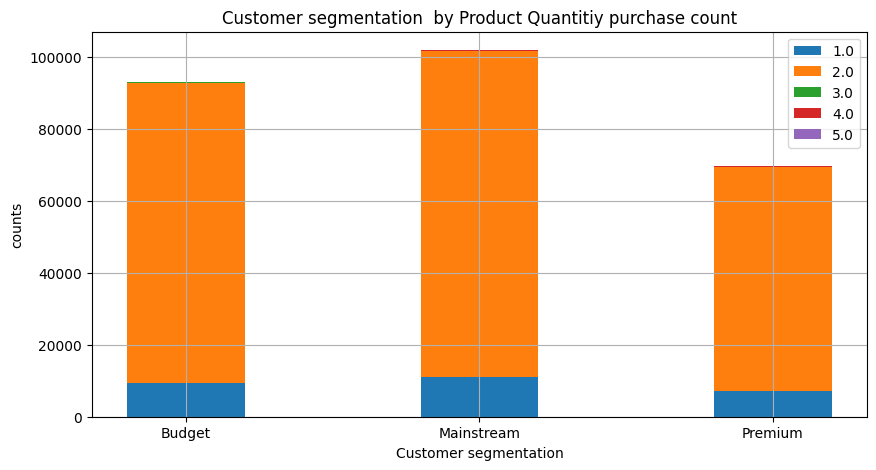

In [34]:
plt.figure(figsize=(10,5))

prem_cus=g.index # rows
prod_qty=g.columns #columns
f=g.values #data pts

for i in range(len(prod_qty)):
  plt.bar(prem_cus, f[:,i], bottom=f[:,:i].sum(axis=1),label=str(prod_qty[i]),width=0.4)
plt.title('Customer segmentation  by Product Quantitiy purchase count')
plt.xlabel('Customer segmentation')
plt.ylabel('counts')
plt.grid()
plt.legend()

From the above diagram we can see Budget, Mainstream and Premium categories consists of Product quantity 2 than any other product quantity. And Mainstream is top most in the customer segmentation in the product quantity.

#  STATISTICAL ANALYSIS

In [35]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [36]:
df_anova = dfn[['PREMIUM_CUSTOMER', 'PROD_QTY', 'TOT_SALES']].copy()
df_anova['PREMIUM_CUSTOMER']=df_anova['PREMIUM_CUSTOMER'].astype('category')
df_anova['PROD_QTY'] = df_anova['PROD_QTY'].astype('category')
df_anova

,PREMIUM_CUSTOMER,PROD_QTY,TOT_SALES
0,Premium,2.0,6.0
1,Mainstream,1.0,2.7
2,Budget,1.0,3.6
3,Budget,1.0,3.0
4,Mainstream,1.0,1.9
...,...,...,...
264829,Budget,2.0,9.2
264830,Mainstream,2.0,13.0
264831,Mainstream,2.0,7.2
264832,Premium,2.0,9.2


In [37]:
# Premium customer vs Product qty vs Total sales

#Null-Hypothesis
H01='There is no significant effect for Premium customer categories on Total saless'
H02='There is no significant effect for Product quantity categories on Total sales'
H03=' There is no significant interaction between the Premium Customer and Product quantity over Total Sales'


#Alternative-Hypothesis
H11='There is a significant effect for Premium customer categories on Total saless'
H12='There is a significant effect for Product quantity categories on Total sales'
H13=' There is a significant interaction between the Premium Customer and Product quantity over Total Sales'

#Two way anova

model = ols('TOT_SALES ~ C(PREMIUM_CUSTOMER) + C(PROD_QTY) + C(PREMIUM_CUSTOMER):C(PROD_QTY)', data=df_anova).fit()
anova_table = sm.stats.anova_lm(model,typ=2)
anova_table


,sum_sq,df,F,PR(>F)
C(PREMIUM_CUSTOMER),9.566988e+02,2.0,99.142899,9.097547e-44
C(PROD_QTY),3.280799e+05,4.0,16999.497369,0.000000e+00
C(PREMIUM_CUSTOMER):C(PROD_QTY),1.998609e+01,8.0,0.517791,8.440581e-01
Residual,1.275593e+06,264380.0,NaN,NaN




---


RESULT:

✈ PREMIUM_CUSTOMER: The Pvalue(9.09*10^-44) < 0.05, There is significant effect on Premium customer categories on Total sales.

✈PROD_QTY: The pvalue(0) < 0.05, There is  a significant effect Product quantity categories on Total sales.

✈ INTERACTION: The pvalue(0.844) > 0.05, There is no significant interaction between the Premium Customer  and Product quantity over Total Sales.

---




In [38]:
T=dfn[['LIFESTAGE','PREMIUM_CUSTOMER','TOT_SALES']].copy()
T['LIFESTAGE']=T['LIFESTAGE'].astype('category')
T

,LIFESTAGE,PREMIUM_CUSTOMER,TOT_SALES
0,YOUNG SINGLES/COUPLES,Premium,6.0
1,YOUNG SINGLES/COUPLES,Mainstream,2.7
2,YOUNG FAMILIES,Budget,3.6
3,YOUNG FAMILIES,Budget,3.0
4,OLDER SINGLES/COUPLES,Mainstream,1.9
...,...,...,...
264829,OLDER SINGLES/COUPLES,Budget,9.2
264830,MIDAGE SINGLES/COUPLES,Mainstream,13.0
264831,YOUNG FAMILIES,Mainstream,7.2
264832,YOUNG FAMILIES,Premium,9.2


In [39]:

##Lifestage vs premium customer over Toatal sales

#Null-Hypothesis
H01='There is no significant effect for Lifestage categories on Total sales'
H02='There is no significant effect for Premium customer categories on Total sales'
H03=' There is no significant interaction between the Premium Customer and Lifestage over Total Sales'

#Alternative-Hypothesis

H11='There is a significant effect for Lifestage categories on Total sales'
H12='There is a significant effect for Premium customer categories on Total sales'
H13=' There is significant interaction between the Premium Customer and Lifestage over Total Sales'


#2way anova
Twoway2=ols('TOT_SALES~C(LIFESTAGE)+C(PREMIUM_CUSTOMER)+C(LIFESTAGE):C(PREMIUM_CUSTOMER)',data=T).fit()
result=sm.stats.anova_lm(Twoway2,typ=2)
result

,sum_sq,df,F,PR(>F)
C(LIFESTAGE),1.692393e+03,6.0,46.827006,1.051333e-57
C(PREMIUM_CUSTOMER),7.782848e+02,2.0,64.603326,8.912216e-29
C(LIFESTAGE):C(PREMIUM_CUSTOMER),9.526596e+03,12.0,131.796179,0.000000e+00
Residual,1.592474e+06,264374.0,NaN,NaN




---


RESULT:

✈Lifestage: The pvalue(1.05 x 10^-53) < 0.05, 'There is a significant effect for Lifestage categories on Total sales'

✈Premium_Customer: The pvalue(8.91 x 10^-29) < 0.05,'There is a significant effect for Premium customer categories on Total sales.

✈Interaction: The pvalue(0) < 0.05,There is significant interaction between the Premium Customer and Lifestage over Total Sales.


---



In [40]:
T2=dfn[['LIFESTAGE','PROD_QTY','TOT_SALES']].copy()
T2['PROD_QTY']= T2['PROD_QTY'].astype('category')
print(T2.dtypes)

LIFESTAGE      object
PROD_QTY     category
TOT_SALES     float64
dtype: object


In [41]:
T2

,LIFESTAGE,PROD_QTY,TOT_SALES
0,YOUNG SINGLES/COUPLES,2.0,6.0
1,YOUNG SINGLES/COUPLES,1.0,2.7
2,YOUNG FAMILIES,1.0,3.6
3,YOUNG FAMILIES,1.0,3.0
4,OLDER SINGLES/COUPLES,1.0,1.9
...,...,...,...
264829,OLDER SINGLES/COUPLES,2.0,9.2
264830,MIDAGE SINGLES/COUPLES,2.0,13.0
264831,YOUNG FAMILIES,2.0,7.2
264832,YOUNG FAMILIES,2.0,9.2


In [42]:
##Lifestage vs product quantity over Toatal sales

#Null-Hypothesis
H01='There is no significant effect for Lifestage categories on Total sales'
H02='There is no significant effect for product quantity categories on Total sales'
H03=' There is no significant interaction between the product quantity and Lifestage over Total Sales'

#Alternative-Hypothesis
H11='There is a significant effect for Lifestage categories on Total sales'
H12='There is a significant effect for product quantity categories on Total sales'
H13=' There is no significant interaction between the product quantity and Lifestage over Total Sales'

#2way anova
Twoway3=ols('TOT_SALES ~ C(LIFESTAGE)+C(PROD_QTY)+ C(LIFESTAGE):C(PROD_QTY)',data=T2).fit()
result2=sm.stats.anova_lm(Twoway3,typ=2)
result2

,sum_sq,df,F,PR(>F)
C(LIFESTAGE),4.602720e+03,6.0,159.539242,3.732649e-203
C(PROD_QTY),3.308119e+05,4.0,17199.876239,0.000000e+00
C(LIFESTAGE):C(PROD_QTY),8.327323e+02,24.0,7.216031,1.486349e-24
Residual,1.271134e+06,264360.0,NaN,NaN




---


RESULT:

✈Lifestage: The pvalue(3.73 x 10^-203) < 0.05, 'There is a significant effect for Lifestage categories on Total sales'

✈Product quantity: The pvalue(0) < 0.05,'There is a significant effect for Product quantity categories on Total sales.

✈Interaction: The pvalue(1.48 x 10^-24) < 0.05,There is significant interaction between the Product quantity and Lifestage over Total Sales.


---



In [43]:
#year wise total sales based on store numbers

YEARLYsalesstores=dfn.pivot_table(index='YEAR',columns=["MONTH"],values='TOT_SALES',aggfunc='sum')
monthorder=[calendar.month_abbr[i] for i in range(1,13)]
YEARLYsalesstores=YEARLYsalesstores[monthorder]
YEARLYsalesstores.reset_index()

MONTH,YEAR,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,2018,NaN,NaN,NaN,NaN,NaN,NaN,165258.2,153283.05,160522.0,164405.5,160233.7,167902.0
1,2019,162642.3,150645.5,166265.2,159845.1,152371.35,160538.6,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
# month wise total sales based on store numbers

monthlysalesstores=dfn.pivot_table(index='STORE_NBR',columns='MONTH',values='TOT_SALES',aggfunc='sum')
monthlysalesstores=monthlysalesstores[monthorder]
monthlysalesstores.reset_index()

MONTH,STORE_NBR,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1,154.8,225.4,192.9,192.9,221.40,174.1,206.9,176.10,278.8,188.1,192.6,189.6
1,2,162.8,139.4,192.1,196.5,192.70,156.6,150.8,193.80,154.4,167.8,162.9,136.0
2,3,1051.7,1197.7,1124.4,920.0,996.90,1037.3,1205.7,1079.75,1021.5,1037.9,1008.0,1121.6
3,4,1525.0,883.4,1192.4,1230.5,1000.65,1196.0,1399.9,1259.50,1198.6,1346.4,1212.0,1185.6
4,5,838.0,727.0,681.4,721.8,701.70,910.8,812.0,723.10,896.0,798.0,771.4,879.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
267,268,157.7,165.0,225.0,191.5,245.80,224.7,224.0,280.85,174.4,237.6,225.4,207.3
268,269,980.4,955.2,845.8,991.2,841.60,864.4,982.0,813.10,886.0,1078.4,967.2,935.4
269,270,1066.6,868.4,991.2,926.4,878.80,912.2,962.8,976.75,845.4,816.4,965.0,1038.0
270,271,842.4,746.2,735.8,774.6,771.90,928.2,956.6,683.90,798.4,790.0,886.4,807.4


In [45]:
tab=dfn.pivot_table(index='PROD_QTY',columns=['STORE_NBR'],values=['TXN_ID','TOT_SALES'],aggfunc='mean')
tab

<ipython-input-45-f86b3402b10e>:1: FutureWarning: pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.
  tab=dfn.pivot_table(index='PROD_QTY',columns=['STORE_NBR'],values=['TXN_ID','TOT_SALES'],aggfunc='mean')


TOT_SALES                                                        \
STORE_NBR       1          2         3          4          5          6     
PROD_QTY                                                                    
1.0        3.479866   3.520575  4.435841   4.161111   4.143750   3.437037   
2.0        6.616260   7.417308  8.857941   8.842506   7.008472   7.111304   
3.0        6.300000  13.800000  9.150000  11.775000  13.200000   7.500000   
4.0        9.000000        NaN  8.200000        NaN  10.600000        NaN   
5.0             NaN  15.000000  8.566667        NaN  15.000000  13.500000   

                                                      ...                  \
STORE_NBR        7         8          9          10   ...   263       264   
PROD_QTY                                              ...                   
1.0         4.438667  4.583333   3.522642   3.480645  ...  4.80  4.706562   
2.0         8.852413  8.802834   6.852419   7.064006  ...  5.15  4.317901   
3.0        12.300000       NaN  13.200000  12.800000  ...   NaN       NaN   
4.0        15.200000       NaN   7.600000  11.866667  ...   NaN  2.700000   
5.0              NaN       NaN        NaN  16.500000  ...   NaN  2.950000   

                                                                       \
STORE_NBR       265       266       267       268       269       270   
PROD_QTY                                                                
1.0        4.569553  3.667793  4.274576  4.650681  6.547500  7.000000   
2.0        4.579762  3.475000  3.314286  4.813081  6.957198  6.898953   
3.0        3.000000       NaN       NaN  4.350000  9.200000  8.125000   
4.0        3.750000  3.000000       NaN  5.100000  6.000000  7.400000   
5.0             NaN       NaN       NaN  5.700000  7.640000  7.900000   

                               
STORE_NBR       271       272  
PROD_QTY                       
1.0        6.760000  7.869231  
2.0        7.023626  8.289617  
3.0        8.266667       NaN  
4.0        6.600000  9.200000  
5.0             NaN       NaN  

[5 rows x 272 columns]


# **MONTHLY SALES EXPERIENCE OF EACH STORE**

This can be broken down by:

    * Total sales revenue
    * Total number of customers
    * Average number of transactions per customer

In [46]:
dfn['YEARMONTH']=dfn['DATE'].dt.year*100+dfn['DATE'].dt.month

<ipython-input-46-702d0116f1ab>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfn['YEARMONTH']=dfn['DATE'].dt.year*100+dfn['DATE'].dt.month


In [47]:
t1=dfn.groupby(['STORE_NBR','YEARMONTH'])['TOT_SALES'].sum().reset_index() #Total sales revenue
t2=dfn.groupby(['STORE_NBR','YEARMONTH'])['LYLTY_CARD_NBR'].nunique().reset_index()#total n customers
t3=(dfn.groupby(['STORE_NBR','YEARMONTH'])['LYLTY_CARD_NBR'].sum()/dfn.groupby(['STORE_NBR','YEARMONTH'])['TXN_ID'].nunique()).reset_index()# avg trans/customer
t4=(dfn.groupby(['STORE_NBR','YEARMONTH'])['PROD_QTY'].sum()/dfn.groupby(['STORE_NBR','YEARMONTH'])['TXN_ID'].nunique()).reset_index() #nchips/txn
t5=(dfn.groupby(['STORE_NBR','YEARMONTH'])['TOT_SALES'].sum()/dfn.groupby(['STORE_NBR','YEARMONTH'])['PROD_QTY'].sum()).reset_index()# avg price per unit

In [48]:
m= pd.merge(t1, t2, on=['STORE_NBR', 'YEARMONTH'])
m = pd.merge(m, t3, on=['STORE_NBR', 'YEARMONTH'])
m = pd.merge(m, t4, on=['STORE_NBR', 'YEARMONTH'])
m = pd.merge(m, t5, on=['STORE_NBR', 'YEARMONTH'])
m.columns=['STORE_NBR','YEARMONTH','TOT_SALES','LYLTY_CARD_NBR','AVGTXNCUS','NCHIPERSTXN','AVGPRICEUNIT']
m

,STORE_NBR,YEARMONTH,TOT_SALES,LYLTY_CARD_NBR,AVGTXNCUS,NCHIPERSTXN,AVGPRICEUNIT
0,1,201807,206.9,49,1267.365385,1.192308,3.337097
1,1,201808,176.1,42,1267.953488,1.255814,3.261111
2,1,201809,278.8,59,1235.403226,1.209677,3.717333
3,1,201810,188.1,44,1264.666667,1.288889,3.243103
4,1,201811,192.6,46,1278.787234,1.212766,3.378947
...,...,...,...,...,...,...,...
3164,272,201902,395.5,45,272189.666667,1.895833,4.346154
3165,272,201903,442.3,50,272189.264151,1.924528,4.336275
3166,272,201904,445.1,54,277136.581818,1.963636,4.121296
3167,272,201905,314.6,34,272222.175,1.925000,4.085714


In [49]:
fulobstr=m.groupby('STORE_NBR')['YEARMONTH'].size().reset_index()
fulobstr=fulobstr[fulobstr['YEARMONTH']==12]['STORE_NBR'].unique()
fulobstr#unique store numbers contains records of entire 12 months

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  12,  13,  14,
        15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,
        28,  29,  30,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,
        42,  43,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,
        56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,
        69,  70,  71,  72,  73,  74,  75,  77,  78,  79,  80,  81,  82,
        83,  84,  86,  87,  88,  89,  90,  91,  93,  94,  95,  96,  97,
        98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110,
       111, 112, 113, 114, 115, 116, 118, 119, 120, 121, 122, 123, 124,
       125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137,
       138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150,
       151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163,
       164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176,
       177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 18

In [50]:
#filtering the pretrial periods with the full observations stores
fpt=m[(m['YEARMONTH']<201902) & m['STORE_NBR'].isin(fulobstr)]
fpt

,STORE_NBR,YEARMONTH,TOT_SALES,LYLTY_CARD_NBR,AVGTXNCUS,NCHIPERSTXN,AVGPRICEUNIT
0,1,201807,206.9,49,1267.365385,1.192308,3.337097
1,1,201808,176.1,42,1267.953488,1.255814,3.261111
2,1,201809,278.8,59,1235.403226,1.209677,3.717333
3,1,201810,188.1,44,1264.666667,1.288889,3.243103
4,1,201811,192.6,46,1278.787234,1.212766,3.378947
...,...,...,...,...,...,...,...
3159,272,201809,304.7,32,272224.444444,1.888889,4.480882
3160,272,201810,430.6,44,277656.12,1.920000,4.485417
3161,272,201811,376.2,41,272217.222222,1.888889,4.425882
3162,272,201812,403.9,47,272209.617021,1.914894,4.487778


In [125]:
fpt['AVGTXNCUS'] = fpt['AVGTXNCUS'].astype(float)
fpt.dtypes

<ipython-input-125-d777299ccdba>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fpt['AVGTXNCUS'] = fpt['AVGTXNCUS'].astype(float)


STORE_NBR           int64
YEARMONTH           int64
TOT_SALES         float64
LYLTY_CARD_NBR      int64
AVGTXNCUS         float64
NCHIPERSTXN       float64
AVGPRICEUNIT      float64
dtype: object

# COMPARISON: CONTROL STORES vs TRIAL STORES


* Control Stores:These kind of stores are usually not fall under any criteria or conditions to follow when takend under the study or experiments based on its performances.
* Trial Stores:These stroes are ones need to staisfy the certain conditions and everything will be monitored based on its real time performances and it will receives some extra treaments when compare to control stores.



   *Control Stores : We can choose it on our own.I choose(100,160,200)

  Metric To be used: Pearson Correlation

# PEARSON CORRELATION:
 * Pearson’s correlation coefficient is the test statistics that measures the statistical relationship, or association, between two continuous variables.

 * It is known as the best method of measuring the association between variables of interest because it is based on the method of covariance.

 * It gives information about the magnitude of the association, or correlation, as well as the direction of the relationship.

ASSUMPTIONS:


* Data pts should be independent to each other.
* Two variable which we are comparing its should be posses linear in relationship(visulalized with scatter plot).
* Residuals should satisfy the homoscedasticity(homogeneous variances)

#HYPOTHESIS STATEMENTS:

# H0: There is significant relationship between the Trial store and Control stores in terms of Total Sales(ie., r=0)


# H0: There is  a significant relationship between the Trial store and Control stores in terms of Total Sales(ie., r≠0)

In [51]:
from PIL import Image

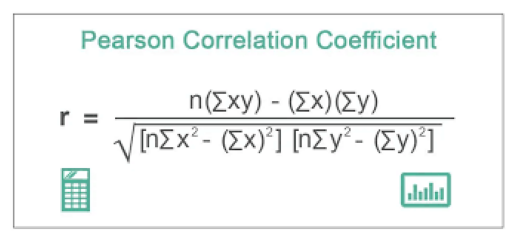

In [52]:
a= Image.open('/content/drive/MyDrive/01/1.png')
plt.imshow(a)
plt.axis('off')
plt.show()

In [112]:
result=[]
def co(measure):


  trial_str=int(input('Enter the trial store number to compare:'  ))
  control_str=[]
  for i in range(3):
    c=int(input("Enter the control store number to compare : "))
    control_str.append(c)
  print(control_str)

  plt.figure(figsize=(15,8))

  # trial store part
  triald=fpt[fpt['STORE_NBR']==trial_str][measure].values
  plt.plot(range(len(triald)),triald,label=f"Trial store {trial_str}")


  #control store part
  for store in control_str:
    controld=fpt[fpt['STORE_NBR']==store][measure].values
    plt.plot(range(len(controld)),controld,label=f'Control Store {store}')

    #correlation part
    cor,p=r(triald,controld)
    result.append(f"Trial Store: {trial_str} vs Control Store: {store}\n Pearson Corr Coeff: {cor} and Pvalue: {p}")

  #visualization
  months=['July','Aug',"Sep","Oct","Nov","Dec","Jan"]
  plt.xticks(range(0,len(triald)),months)
  plt.xlabel('Months')
  plt.ylabel('Total Sales')
  plt.title("Comparison: Trial Store vs Control Stores")
  plt.legend()
  plt.show()


# TOTAL SALES

Enter the trial store number to compare:77
Enter the control store number to compare : 100
Enter the control store number to compare : 160
Enter the control store number to compare : 200
[100, 160, 200]


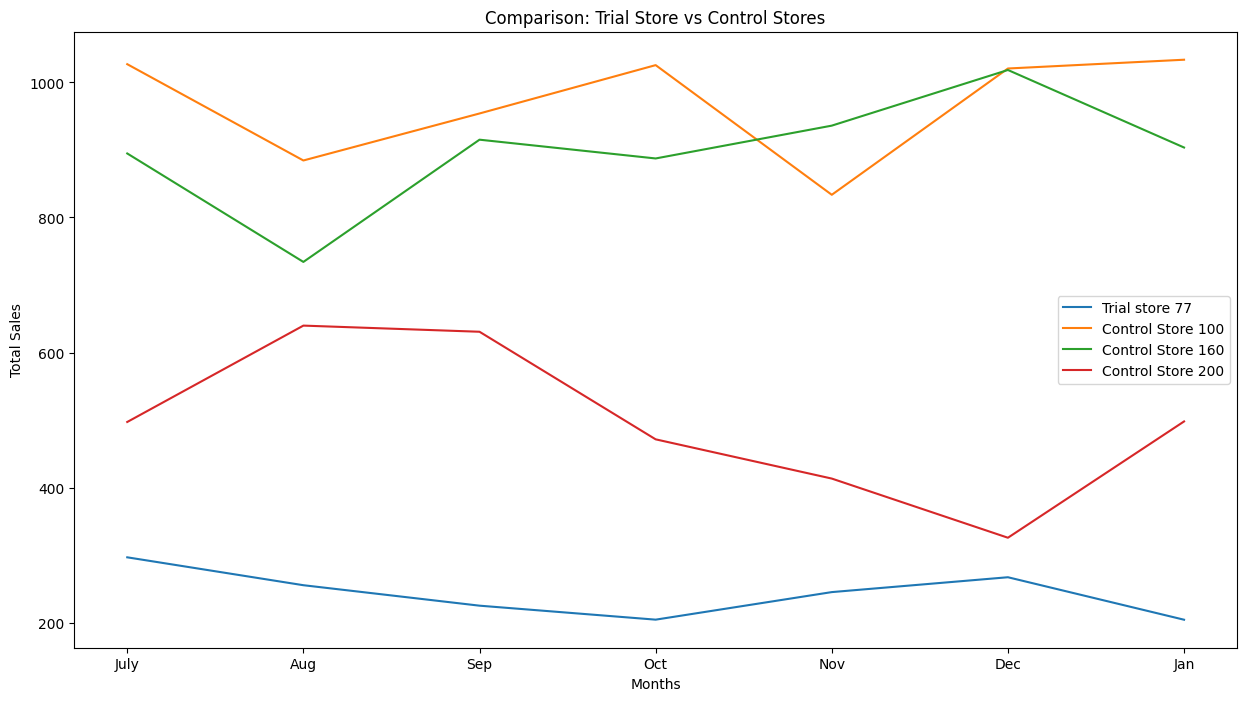

In [59]:
co('TOT_SALES')

Note:
  Thus from the above visualization one can easily infer that the Control store 100 and 160 performed well when comapring with trial store 77.

Enter the trial store number to compare:86
Enter the control store number to compare : 100
Enter the control store number to compare : 160
Enter the control store number to compare : 200
[100, 160, 200]


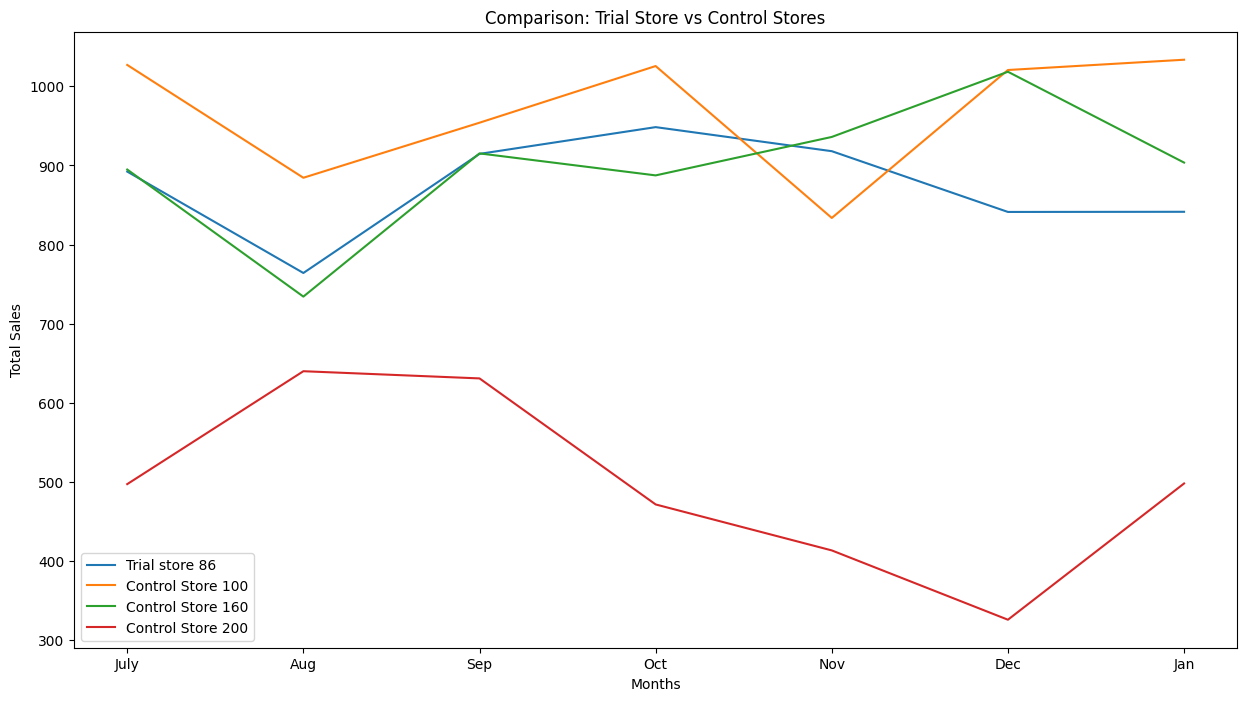

In [60]:
co('TOT_SALES')

Note:
  Thus from the above visualization one can easily infer that the control store 100 and 160 performed well than trial store 86 in Total sales

Enter the trial store number to compare:88
Enter the control store number to compare : 100
Enter the control store number to compare : 160
Enter the control store number to compare : 200
[100, 160, 200]


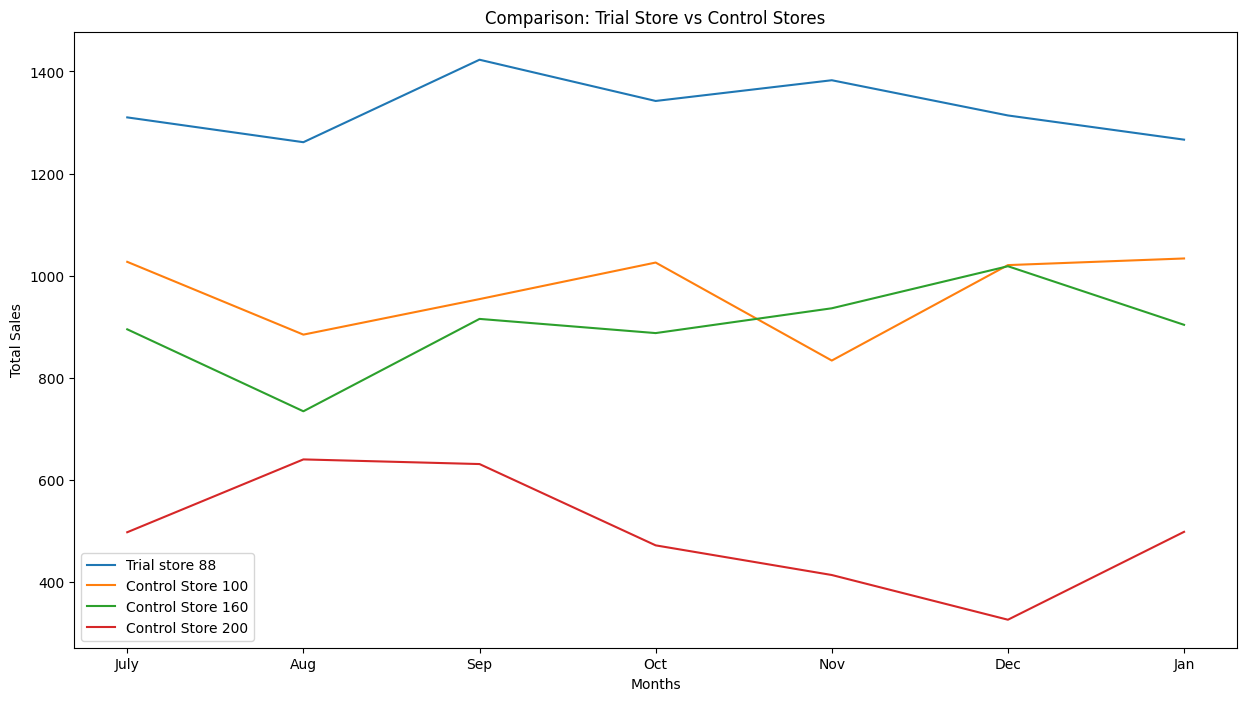

In [61]:
co('TOT_SALES')

 Note:
  Thus from the above visualization one can easily infer that the trial store 88 performed well than the Control stores 100 and 160 in Total sales.

In [62]:
#RESULTS

for i in result: print(i)

Trial Store: 77 vs Control Store: 100
 Pearson Corr Coeff: -0.08509299640777934 and Pvalue: 0.856064072466849
Trial Store: 77 vs Control Store: 160
 Pearson Corr Coeff: 0.03929376972427545 and Pvalue: 0.9333443107219689
Trial Store: 77 vs Control Store: 200
 Pearson Corr Coeff: -0.17483822339321067 and Pvalue: 0.7077011097876388
Trial Store: 86 vs Control Store: 100
 Pearson Corr Coeff: 0.13815335794044958 and Pvalue: 0.7676953748591607
Trial Store: 86 vs Control Store: 160
 Pearson Corr Coeff: 0.4814263901366128 and Pvalue: 0.27402753632610627
Trial Store: 86 vs Control Store: 200
 Pearson Corr Coeff: -0.24322192253487876 and Pvalue: 0.5991976206057374
Trial Store: 88 vs Control Store: 100
 Pearson Corr Coeff: -0.284847926108035 and Pvalue: 0.5358041609783513
Trial Store: 88 vs Control Store: 160
 Pearson Corr Coeff: 0.41428840929454946 and Pvalue: 0.35545172635588856
Trial Store: 88 vs Control Store: 200
 Pearson Corr Coeff: 0.01553886691174368 and Pvalue: 0.9736235848695028


RESULTS:

✈STORE NO: 77

  Since all the Control Stores(100,160,200)  pvalues > 0.05, so There is no significant corelation between  control store and trail store based on the Total Sales.

✈STORE NO: 86

  Since all the Control Stores(100,160,200)  pvalues > 0.05, so There is no significant  correlation between  control store and trail store based on the Total Sales.

✈STORE NO: 88

  Since all the Control Stores(100,160,200)  pvalues > 0.05, so There is no significant correlation between  control store and trail store based on the Total Sales.

# AVG PRICE PER UNIT

Enter the trial store number to compare:77
Enter the control store number to compare : 100
Enter the control store number to compare : 160
Enter the control store number to compare : 200
[100, 160, 200]


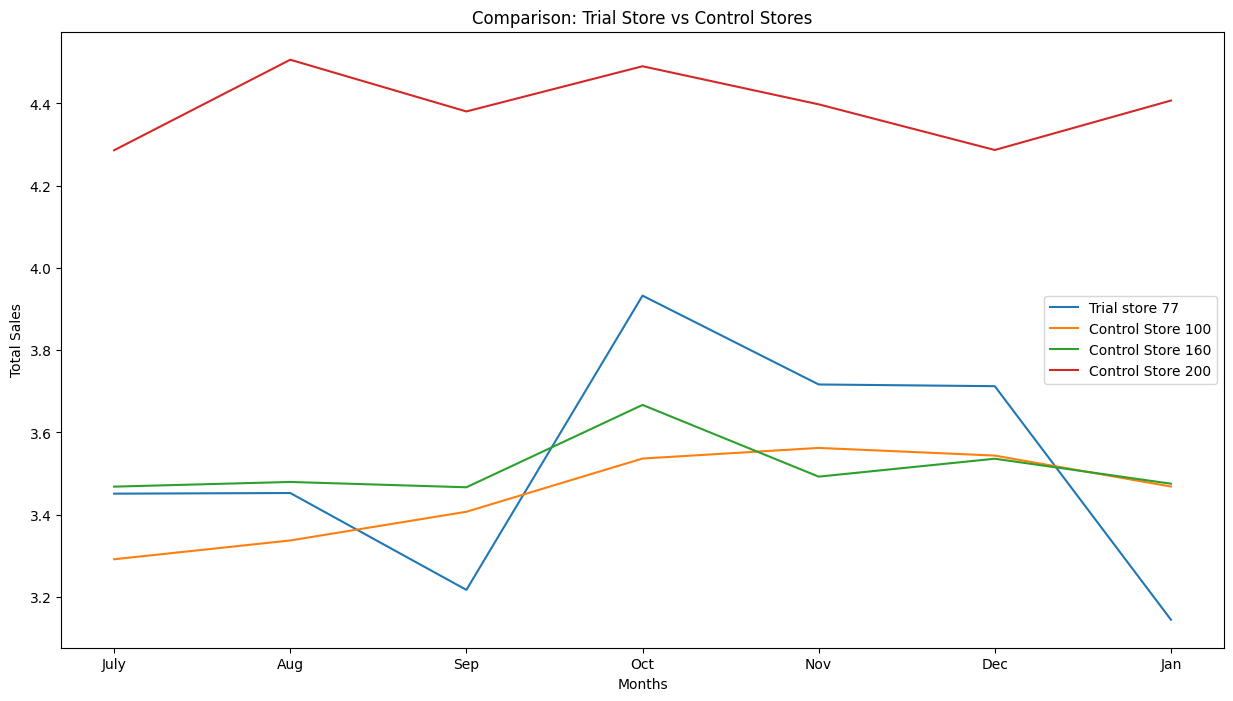

In [113]:
co('AVGPRICEUNIT')

Enter the trial store number to compare:86
Enter the control store number to compare : 100
Enter the control store number to compare : 160
Enter the control store number to compare : 200
[100, 160, 200]


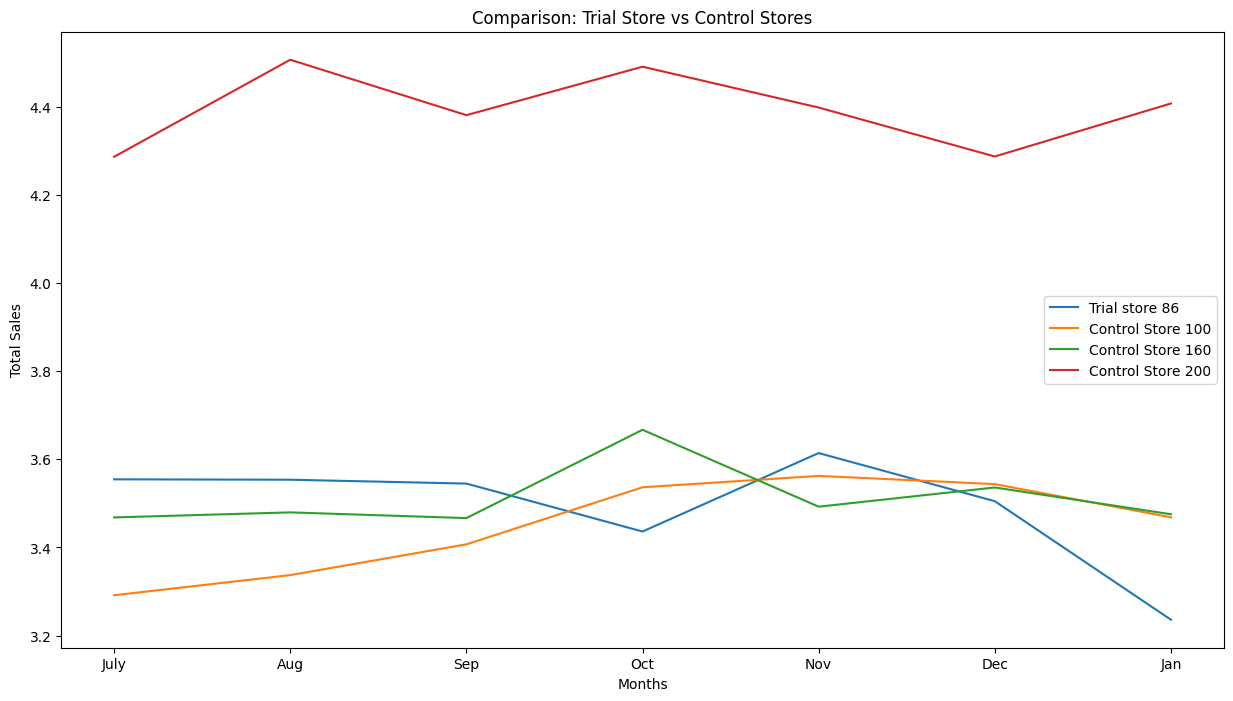

In [114]:
co('AVGPRICEUNIT')

Enter the trial store number to compare:88
Enter the control store number to compare : 100
Enter the control store number to compare : 160
Enter the control store number to compare : 200
[100, 160, 200]


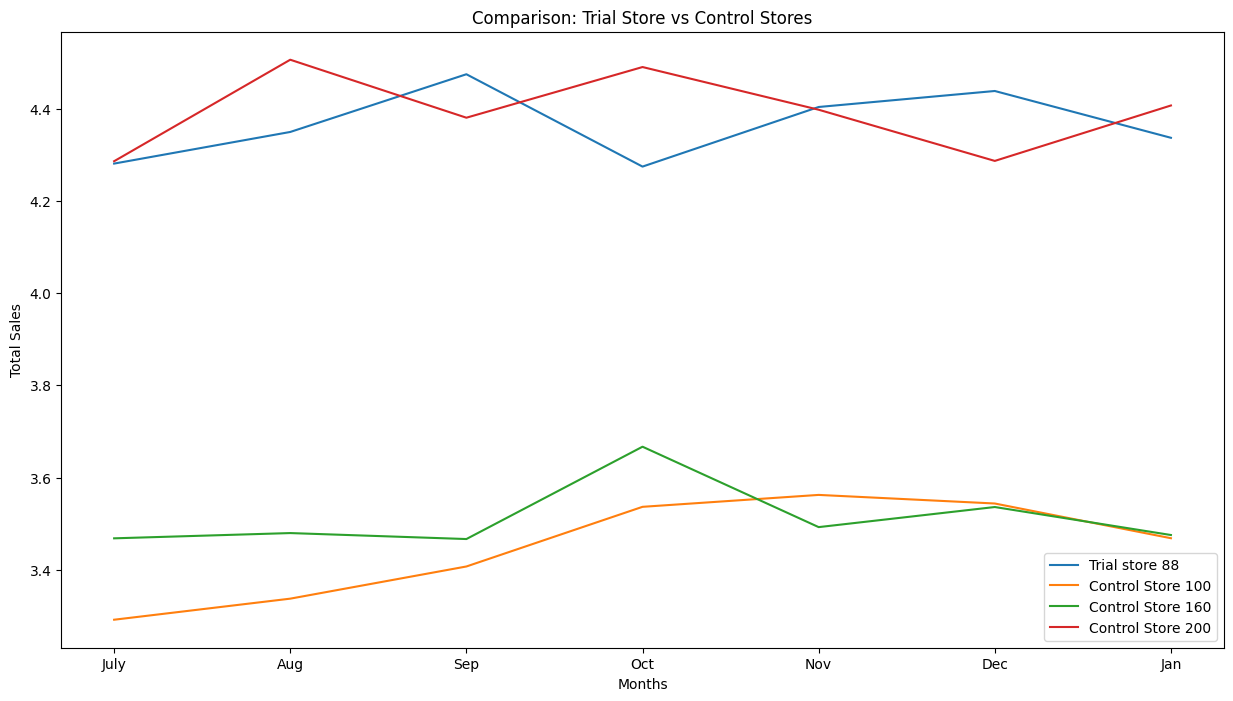

In [115]:
co('AVGPRICEUNIT')

In [116]:
for i in result: print(i)

Trial Store: 77 vs Control Store: 100
 Pearson Corr Coeff: 0.5477703449850323 and Pvalue: 0.20306315364859653
Trial Store: 77 vs Control Store: 160
 Pearson Corr Coeff: 0.7880146574139497 and Pvalue: 0.03532061938604388
Trial Store: 77 vs Control Store: 200
 Pearson Corr Coeff: 0.1274350314290931 and Pvalue: 0.7854119344840905
Trial Store: 86 vs Control Store: 100
 Pearson Corr Coeff: -0.1704881384732178 and Pvalue: 0.714758254556404
Trial Store: 86 vs Control Store: 160
 Pearson Corr Coeff: -0.15604808593329636 and Pvalue: 0.7382982043765167
Trial Store: 86 vs Control Store: 200
 Pearson Corr Coeff: -0.15553597826057863 and Pvalue: 0.7391361268494586
Trial Store: 88 vs Control Store: 100
 Pearson Corr Coeff: 0.26848751544490634 and Pvalue: 0.5604504882624801
Trial Store: 88 vs Control Store: 160
 Pearson Corr Coeff: -0.3848144935444825 and Pvalue: 0.39399408058542834
Trial Store: 88 vs Control Store: 200
 Pearson Corr Coeff: -0.2743616736558129 and Pvalue: 0.5515596992208659


RESULTS:

✈STORE NO: 77

  Since all the Control Stores(100 and 200)  pvalues > 0.05, so There is no significant correlation between  control store and trail store based on the Avg price/unit.

  But Control Store: 160 pvalue(0.035) < 0.05, There is a significant Strong Positive correlation(uphill trend) found between the Control Store 160 and Trial store 77 based on Avg price/unit.

✈STORE NO: 86

  Since all the Control Stores(100,160,200)  pvalues > 0.05, so There is no significant relation between  control store and trail store based on the Avg price/unit.

✈STORE NO: 88

  Since all the Control Stores(100,160,200)  pvalues > 0.05, so There is no significant relation between  control store and trail store based on the Avg price/unit.


# INDEPENDENT SAMPLE    t-TEST

* Independent sample t-test is a statistical technique that is used to analyze the mean comparison of two independent groups.

* In independent samples t-test, when we take two samples from the same population, then the mean of the two samples may be identical.

* But when samples are taken from two different populations, then the mean of the sample may differ.

* In this case, it is used to draw conclusions about the means of two populations, and used to tell whether or not they are simila

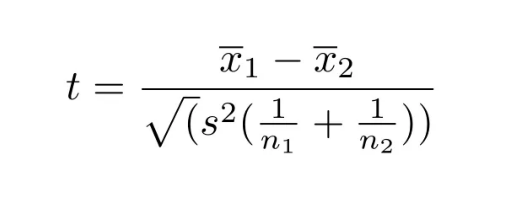

In [98]:
b = Image.open("/content/drive/MyDrive/01/t.webp")
plt.imshow(b)
plt.axis('off')
plt.show()

#HYPOTHESIS:

#H0: There is no significant difference between the means of Control stores and Trial store in terms of the (measure). ie., μi = μj

#H1: There is no significant difference between the means of Control stores and Trial store in terms of the (measure). ie., μi ≠ μj

In [121]:
#t test

def tindtest(measure):
  t_results=[]
  # inputs of Control and trial stores
  trial_str=int(input("Enter the Trial Store no for t-Test : "))
  control_str=[]

  for i in range(3):
    control=int(input("Enter the Control Store no for t-Test : "))
    control_str.append(control)
  print(control_str)

  #data for control and Trial stores
  triald=fpt[fpt['STORE_NBR']==trial_str][measure].values

  for i in control_str:
    controld=fpt[fpt['STORE_NBR']==i][measure].values
    tstat,pvalue=tin(triald,controld)
    t_results.append(f"Trial Store {trial_str} vs Control Store {i} \n" + f" t-Statistic : {tstat} and pvalue : {pvalue}")

  print(*t_results,sep='\n')

# TOTAL SALES

In [122]:
tindtest('TOT_SALES')

Enter the Trial Store no for t-Test : 77
Enter the Control Store no for t-Test : 100
Enter the Control Store no for t-Test : 160
Enter the Control Store no for t-Test : 200
[100, 160, 200]
Trial Store 77 vs Control Store 100 
 t-Statistic : -21.915609403967654 and pvalue : 4.7823256357852965e-11
Trial Store 77 vs Control Store 160 
 t-Statistic : -18.97778171047652 and pvalue : 2.571205180150007e-10
Trial Store 77 vs Control Store 200 
 t-Statistic : -5.739937055818855 and pvalue : 9.309304070787809e-05


RESULTS:

✈Trial Store: 77

  Since the all the p values < 0.05. So, that there is a significant differences among the means of the Control Stores and Trial stores in terms of Total Sales.

In [96]:
tindtest('TOT_SALES')

Enter the Trial Store no for t-Test : 78
Enter the Control Store no for t-Test : 100
Enter the Control Store no for t-Test : 160
Enter the Control Store no for t-Test : 200
[100, 160, 200]
Trial Store 78 vs Control Store 100 
 t-Statistic : -5.253536078711854 and pvalue : 0.00020321639269872007
Trial Store 78 vs Control Store 160 
 t-Statistic : -3.2024572540693304 and pvalue : 0.0075978126211862515
Trial Store 78 vs Control Store 200 
 t-Statistic : 6.054428989648165 and pvalue : 5.719795520260562e-05


RESULTS:
* Since the P value < 0.05 of Control Store:100 and 200. So, There is a significant differences among the means of the Control Store(100 and 200) and Trial store in terms of Total Sales.

* But the pvalue > 0.05 for Control Store : 160. So , There is no significant differences among the means of the Control store: 160 and Trial store: 78 in terms of Total Sales.



In [97]:
tindtest('TOT_SALES')

Enter the Trial Store no for t-Test : 80
Enter the Control Store no for t-Test : 100
Enter the Control Store no for t-Test : 160
Enter the Control Store no for t-Test : 200
[100, 160, 200]
Trial Store 80 vs Control Store 100 
 t-Statistic : 0.4992964759893807 and pvalue : 0.6265983777122568
Trial Store 80 vs Control Store 160 
 t-Statistic : 2.0152844591712897 and pvalue : 0.06683672903360273
Trial Store 80 vs Control Store 200 
 t-Statistic : 9.245162885994075 and pvalue : 8.30528423278519e-07


RESULTS:
* Since the P value < 0.05 of Control Store:200. So, There is a significant differences among the means of the Control Store: 200 and Trial store: 80 in terms of Total Sales.

* But the pvalue > 0.05 for Control Store : 100 and 160. So , There is no significant differences among the means of the Control store:100 and 160  vs Trial store: 80 in terms of Total Sales.


# AVG TRANSACTION PER CUSTOMER

In [126]:
tindtest('AVGTXNCUS')

Enter the Trial Store no for t-Test : 77
Enter the Control Store no for t-Test : 100
Enter the Control Store no for t-Test : 160
Enter the Control Store no for t-Test : 200
[100, 160, 200]
Trial Store 77 vs Control Store 100 
 t-Statistic : 1.4693145773945786 and pvalue : 0.1674710184745898
Trial Store 77 vs Control Store 160 
 t-Statistic : 0.3327595732329309 and pvalue : 0.7450570331277895
Trial Store 77 vs Control Store 200 
 t-Statistic : -0.3945687984171769 and pvalue : 0.7000839230007138


RESULTS:

* Since the pvalue > 0.05 for Control Store : 100,160 and 200. So , There is no significant differences among the means of the Control store:100 and 160  vs Trial store: 77 in terms of  Average Transaction per customer.

In [127]:
tindtest('AVGTXNCUS')

Enter the Trial Store no for t-Test : 86
Enter the Control Store no for t-Test : 100
Enter the Control Store no for t-Test : 160
Enter the Control Store no for t-Test : 200
[100, 160, 200]
Trial Store 86 vs Control Store 100 
 t-Statistic : -14.348459936202042 and pvalue : 6.450968746863597e-09
Trial Store 86 vs Control Store 160 
 t-Statistic : -64.15604633098889 and pvalue : 1.3630262323020899e-16
Trial Store 86 vs Control Store 200 
 t-Statistic : -92.45871069281459 and pvalue : 1.7125029392549285e-18


RESULTS:
* Since the P value < 0.05 of Control Store:200. So, There is a significant differences among the means of the Control Store: 200 and Trial store: 86 in terms of Average Transaction per customer.

In [128]:
tindtest('AVGTXNCUS')

Enter the Trial Store no for t-Test : 88
Enter the Control Store no for t-Test : 100
Enter the Control Store no for t-Test : 160
Enter the Control Store no for t-Test : 200
[100, 160, 200]
Trial Store 88 vs Control Store 100 
 t-Statistic : 0.7873423846152146 and pvalue : 0.44635422150793147
Trial Store 88 vs Control Store 160 
 t-Statistic : -5.758993586162026 and pvalue : 9.035001795764042e-05
Trial Store 88 vs Control Store 200 
 t-Statistic : -9.938323302610986 and pvalue : 3.828751444022951e-07


RESULTS:
* Since the P value < 0.05 of Control Store:100 and 200. So, There is a significant differences among the means of the Control Store: 200 and Trial store: 88 in terms of Average Transaction per customer.

* But the pvalue > 0.05 of Control Store:100. So, There is no significant  differences among the means of the Control Store: 100 and Trial store: 86 in terms of Average Transaction per customer.

# CONCLUSION:(TASK 3)

**Data Visualization part findings:**

* Paso Sasla, El Paso, Sweet chilli and popd Swt are most prefered brands among the other brands among the population.
*The SaltBinegar, Cheese and SourBream are the top 3 products highly consumed by the people from the dataset.
* The Premium customer segmentation among the people and its about 38.5% for Mainstream is the top most when considering the other two categories of Budget is about 35.2%  and the premium for 28.3%.
* In the given data Older Singles/couples population is very high secondly the retireers, Older families and etc..
*the older family poplulation prefers budget highly compare to other population.
* The Retirees group prefers more on the mainstream category than other way of Premium segmentation.
* Older Singles/Couples population prefers more on the Premium segmentation than any other lifestage categories.
* New families populations are the least participated among the any other population for the any preferences towards the premium segmentation.
* SaltBinegar is the top most  of all 3 of the premium customer segmentation categories.
* SouthernChicken is lowest in the mainstream and premium in the top 10 products.
* SaltChips is the lowest in the budget category of the Premium customers.
* The Store no: 226 has the high amount of sales when considering the top 10 stroes. And store no:26 has the lowest among the top 10 stores based on in its total sales.
* The month December has the highest in terms of sales when compare to other months in the calendar year and the month Feb has the lowest sales among the months of the calendar years.
* The Young Singles and Couples are the top most group when compare to other groups. And Midage Singles and Couples stays at the lower level among the other groups on month wise total sales spending.
* Budget, Mainstream and Premium categories consists of Product quantity 2 than any other product quantity. And Mainstream is top most in the customer segmentation in the product quantity.

**Statistical Analysis findings:**

* There is significant effect on Premium customer categories on Total sales.
* There is  a significant effect Product quantity categories on Total sales.
* There is a significant effect for Lifestage categories on Total sales.
* There is significant interaction between the Premium Customer and Lifestage over Total Sales
* There is a significant effect for Product quantity categories on Total sales.
* There is significant interaction between the Product quantity and Lifestage over Total Sales.

* The Control Stores(100,160,200) and Trial stores(77,86 and 88) have no significant corelation between  control store and trail store based on the Total Sales.
* Control Store: 160, There is a significant Strong Positive correlation(uphill trend) found between the Control Store 160 and Trial store 77 based on Avg price/unit.
* There is a significant differences among the means of the Control Store(100 and 200) and Trial store 77 in terms of Total Sales.
* There is a significant differences among the means of the Control Store(100 and 200) and Trial store 78 in terms of Total Sales.
* There is a significant differences among the means of the Control Store: 200 and Trial store: 80 in terms of Total Sales.
* There is a significant differences among the means of the Control Store: 200 and Trial store: 86 in terms of Average Transaction per customer.
*  There is a significant differences among the means of the Control Store: 200 and Trial store: 88 in terms of Average Transaction per customer.








>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>



In [ ]:
THANK YOU!